In [176]:
import pandas as pd
import seaborn as sns

## Load Dataset

In [177]:
train = pd.read_csv("data/bike/train.csv")

train["datetime"] = pd.to_datetime(train["datetime"])

# train["datetime"].dt.year (month/day/hour/minute/second)

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [178]:
test = pd.read_csv("data/bike/test.csv")

test["datetime"] = pd.to_datetime(test["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Explore

/Users/Kwan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


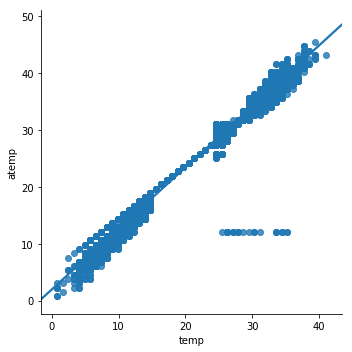

In [179]:
sns.lmplot(data = train, x = "temp", y = "atemp")

/Users/Kwan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


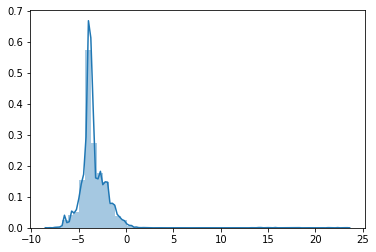

In [180]:
sns.distplot(train["temp"] - train["atemp"]) # Temp와 Atemp Gap 분포 확인

In [181]:
train[train["temp"] - train["atemp"] > 5].shape # atemp 값이 모두 12.12 로 고정. 아마도 측정 오류... atemp값을 gap 평균값인 +3.75 해줌
train.loc[train["temp"] - train["atemp"] > 5, "atemp"] = train[train["temp"] - train["atemp"] > 5]["temp"] + 3.75


/Users/Kwan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


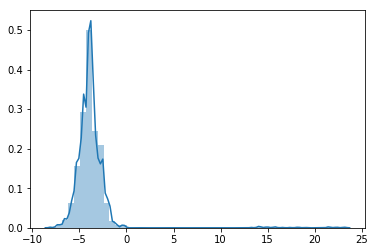

In [182]:
sns.distplot(train_fall["temp"] - train_fall["atemp"])

In [183]:
test[test["temp"] - test["atemp"] > 5].shape # atemp 값이 모두 12.12 로 고정. 아마도 측정 오류... atemp값을 gap 평균값인 +3.75 해줌
test.loc[test["temp"] - test["atemp"] > 5, "atemp"] = test[test["temp"] - test["atemp"] > 5]["temp"] + 3.75


/Users/Kwan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


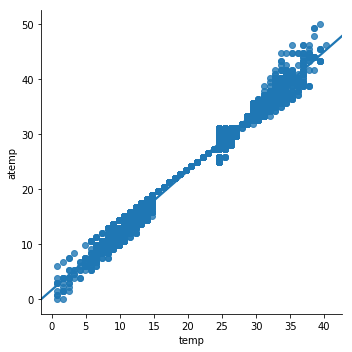

In [184]:
sns.lmplot(data = test, x = "temp", y = "atemp")

/Users/Kwan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


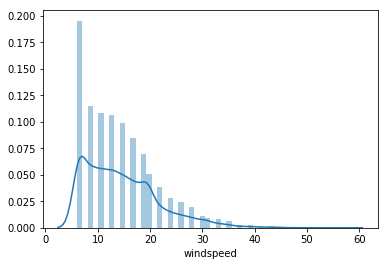

In [185]:
sns.distplot(train[train["windspeed"] != 0]["windspeed"])

In [186]:
train[train["windspeed"] == 0].shape

(1313, 12)

## Preprocessing

In [187]:
## date 처리
# 연/월/시간 추가
# train["datetime"].dt.year (month/day/hour/minute/second)

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour

print(train.shape)
train.head()

(10886, 15)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4


In [188]:
# Test 데이터 시간 처리

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour

print(test.shape)
test.head()

(6493, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4


In [189]:
# Season One Hot Encoding
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
train["spring"] = train["season"] == 1
train["summer"] = train["season"] == 2
train["fall"] = train["season"] == 3
train["winter"] = train["season"] == 4

train[["season", "spring", "summer", "fall", "winter"]].head()

,season,spring,summer,fall,winter
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


In [190]:
# Season One Hot Encoding
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
test["spring"] = test["season"] == 1
test["summer"] = test["season"] == 2
test["fall"] = test["season"] == 3
test["winter"] = test["season"] == 4

test[["season", "spring", "summer", "fall", "winter"]].head()

,season,spring,summer,fall,winter
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


In [191]:
# Weather One Hot Encoding
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
train["pleasant"] = train["weather"] == 1
train["mild"] = train["weather"] == 2
train["light"] = train["weather"] == 3
train["heavy"] = train["weather"] == 4

train[["weather", "pleasant", "mild", "light", "heavy"]].head()

,weather,pleasant,mild,light,heavy
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


In [192]:
# Weather One Hot Encoding
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

test["pleasant"] = test["weather"] == 1
test["mild"] = test["weather"] == 2
test["light"] = test["weather"] == 3
test["heavy"] = test["weather"] == 4

test[["weather", "pleasant", "mild", "light", "heavy"]].head()

,weather,pleasant,mild,light,heavy
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


In [193]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month,hour,spring,summer,fall,winter,pleasant,mild,light,heavy
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,1,0,True,False,False,False,True,False,False,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,1,1,True,False,False,False,True,False,False,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,1,2,True,False,False,False,True,False,False,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,1,3,True,False,False,False,True,False,False,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,1,4,True,False,False,False,True,False,False,False
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,...,1,5,True,False,False,False,False,True,False,False
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,...,1,6,True,False,False,False,True,False,False,False
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,...,1,7,True,False,False,False,True,False,False,False
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,...,1,8,True,False,False,False,True,False,False,False
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,...,1,9,True,False,False,False,True,False,False,False


### Train

In [209]:
feature_names = ["workingday","temp","atemp","humidity","windspeed","year","hour","spring","summer","fall","winter","pleasant","mild","light","heavy"]
feature_names

['workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'spring',
 'summer',
 'fall',
 'winter',
 'pleasant',
 'mild',
 'light',
 'heavy']

In [210]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()


(10886, 15)


,workingday,temp,atemp,humidity,windspeed,year,hour,spring,summer,fall,winter,pleasant,mild,light,heavy
0,0,9.84,14.395,81,0.0,2011,0,True,False,False,False,True,False,False,False
1,0,9.02,13.635,80,0.0,2011,1,True,False,False,False,True,False,False,False
2,0,9.02,13.635,80,0.0,2011,2,True,False,False,False,True,False,False,False
3,0,9.84,14.395,75,0.0,2011,3,True,False,False,False,True,False,False,False
4,0,9.84,14.395,75,0.0,2011,4,True,False,False,False,True,False,False,False


In [211]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()


(6493, 15)


,workingday,temp,atemp,humidity,windspeed,year,hour,spring,summer,fall,winter,pleasant,mild,light,heavy
0,1,10.66,11.365,56,26.0027,2011,0,True,False,False,False,True,False,False,False
1,1,10.66,13.635,56,0.0000,2011,1,True,False,False,False,True,False,False,False
2,1,10.66,13.635,56,0.0000,2011,2,True,False,False,False,True,False,False,False
3,1,10.66,12.880,56,11.0014,2011,3,True,False,False,False,True,False,False,False
4,1,10.66,12.880,56,11.0014,2011,4,True,False,False,False,True,False,False,False


In [212]:
label_name = "count"

Y_train = train[label_name]

print(Y_train.shape)
Y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

### Use Decision Tree

In [213]:

#from sklearn.tree import DecisionTreeRegressor
#
#model = DecisionTreeRegressor(random_state = 37)
#model


### Random Forest

Random Forest

- Sampling을 하고 이 Sample로 Decision Tree를 만든다
- 해당 작업을 반복하고, 투표를 통해 가장 효율적인 알고리즘을 만든다.

In [214]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [215]:
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [216]:
model.predict(X_test)

array([  8.6,   4.6,   5.1, ..., 105.9, 101.3,  53.2])

In [217]:
predictions = model.predict(X_test)

In [218]:
print(predictions.shape)
predictions

(6493,)


array([  8.6,   4.6,   5.1, ..., 105.9, 101.3,  53.2])

### Submit

In [219]:
submit = pd.read_csv("data/bike/sampleSubmission.csv")

submit["count"] = predictions
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,8.6
1,2011-01-20 01:00:00,4.6
2,2011-01-20 02:00:00,5.1
3,2011-01-20 03:00:00,4.0
4,2011-01-20 04:00:00,2.0


In [220]:
submit.to_csv("data/bike/Submission_RandomForestAfterProcessin.csv", index = False)